<h1>Импорт библиотек

In [16]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [17]:
def sum_prod(X: np.ndarray, V: np.ndarray) -> np.ndarray:
    X_arr = np.array(X)
    V_arr = np.array(V)
    if X_arr.ndim == 2: # single matrix
        X_arr = X_arr[np.newaxis, ...]
    if V_arr.ndim == 1: # single vector
        V_arr = V_arr[np.newaxis, ...]
    if V_arr.ndim == 3 and V_arr.shape[2] == 1:
        V_arr = V_arr.reshape(V_arr.shape[0], V_arr.shape[1])
    k = X_arr.shape[0]
    if V_arr.shape[0] != k:
        raise ValueError("len(X) must equal len(V)")
    n = X_arr.shape[1]
    res = np.zeros(n)
    for i in range(k):
        res = res + X_arr[i].dot(V_arr[i])
    return res

# Тест
def test_sum_prod():
    X = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 2]]]) # k=2, n=2
    V = np.array([[1, 2], [3, 4]])
    res = sum_prod(X, V)
    assert np.allclose(res, [7, 10])
    print("Succes!")

if __name__ == '__main__':
    test_sum_prod()

Succes!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M: np.ndarray, threshold: float = 0.5) -> np.ndarray:
    M_arr = np.array(M)
    return (M_arr > threshold).astype(int)

# Тесты
def test_binarize():
    M = np.array([[0.2, 0.6], [0.5, 0.9]])
    assert np.array_equal(binarize(M, 0.5), np.array([[0, 1], [0, 1]]))
    print("Succes!")

if __name__ == '__main__':
    test_binarize()

Succes!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def _unique_preserve_order(arr: np.ndarray) -> np.ndarray:
    if arr.size == 0:
        return arr
    _, idx = np.unique(arr, return_index=True)
    order = np.argsort(idx)
    return np.array(_)[order]


def unique_rows(mat: np.ndarray) -> [np.ndarray]:
    mat = np.array(mat)
    rows = []
    for row in mat:
        if row.size == 0:
            rows.append(np.array([]))
            continue
        vals, idx = np.unique(row, return_index=True)
        order = np.argsort(idx)
        rows.append(vals[order])
    return rows


def unique_columns(mat: np.ndarray) -> [np.ndarray]:
    mat = np.array(mat)
    cols = []
    for col in mat.T:
        if col.size == 0:
            cols.append(np.array([]))
            continue
        vals, idx = np.unique(col, return_index=True)
        order = np.argsort(idx)
        cols.append(vals[order])
    return cols

# Тесты
def test_unique_rows_columns():
    mat = np.array([[1, 2, 1], [3, 3, 4]])
    rows = unique_rows(mat)
    assert isinstance(rows, list)
    assert np.array_equal(rows[0], np.array([1, 2]))
    assert np.array_equal(rows[1], np.array([3, 4]))
    cols = unique_columns(mat)
    assert np.array_equal(cols[0], np.array([1, 3]))
    print("Succes!")

if __name__ == '__main__':
    test_unique_rows_columns()

Succes!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

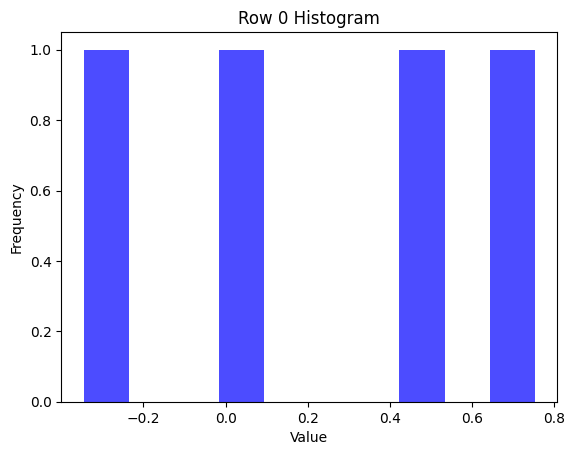

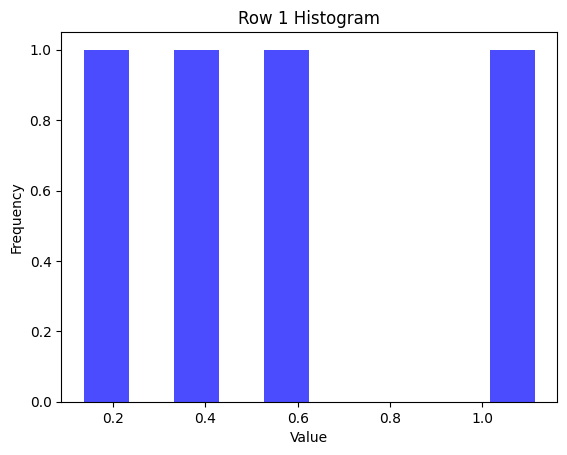

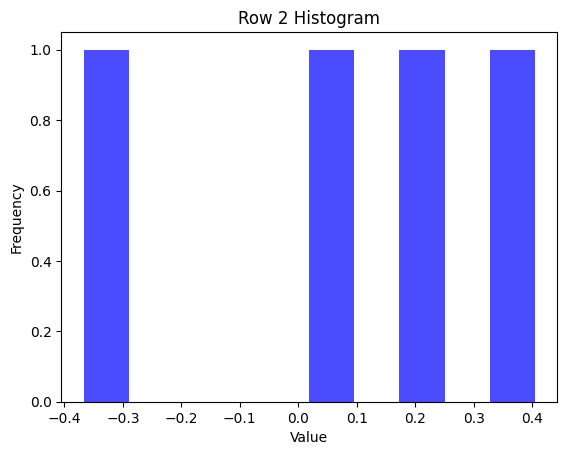

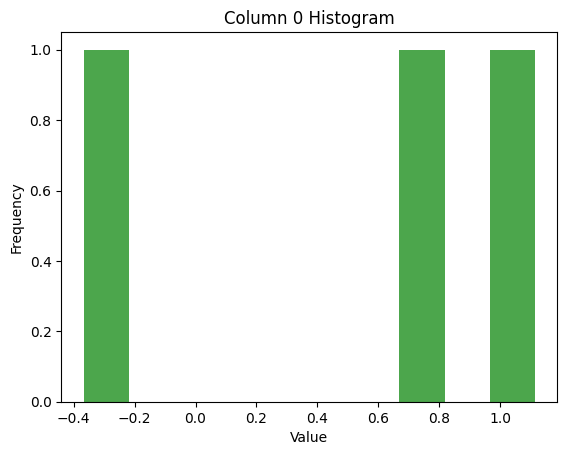

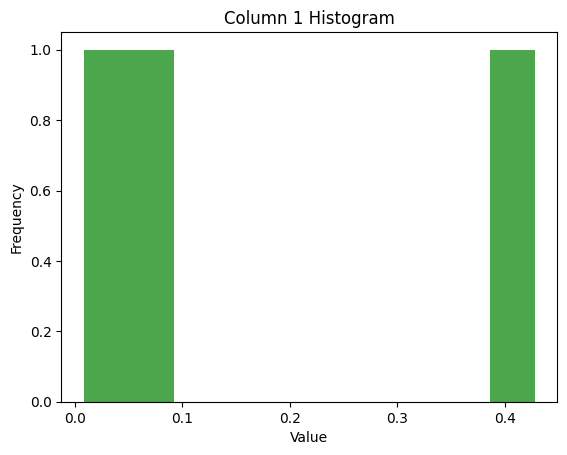

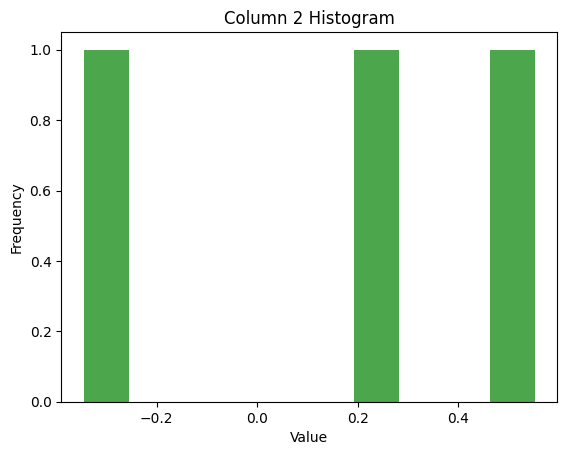

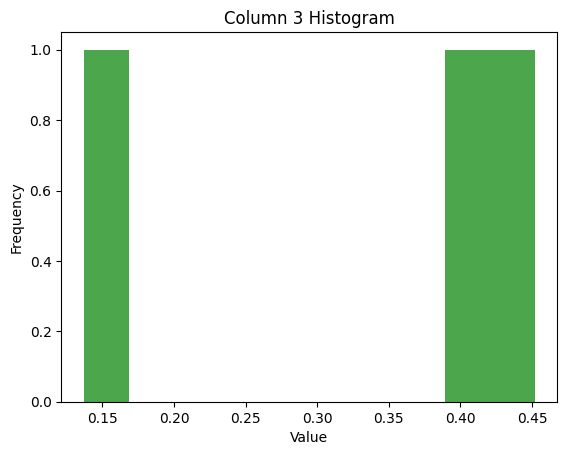

Succes!


In [28]:
def analyze_matrix(m, n):
    M = np.random.randn(m, n)
    
    row_means = M.mean(axis=1)
    row_vars = M.var(axis=1)
    
    col_means = M.mean(axis=0)
    col_vars = M.var(axis=0)
    
    for i, row in enumerate(M):
        plt.figure()
        plt.hist(row, bins=10, alpha=0.7, color='blue')
        plt.title(f"Row {i} Histogram")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
    
    for j, col in enumerate(M.T):
        plt.figure()
        plt.hist(col, bins=10, alpha=0.7, color='green')
        plt.title(f"Column {j} Histogram")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
    
    return {"row_means": row_means, "row_vars": row_vars,
            "col_means": col_means, "col_vars": col_vars}

def test_analyze_matrix():
    result = analyze_matrix(3, 4)
    assert "row_means" in result
    assert "row_vars" in result
    assert "col_means" in result
    assert "col_vars" in result
    assert len(result["row_means"]) == 3
    assert len(result["col_means"]) == 4
    print("Succes!")

if __name__ == "__main__":
    test_analyze_matrix()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
def chess(m: int, n: int, a: float, b: float) -> np.ndarray:
    mat = np.empty((m, n), dtype=type(a+b))
    for i in range(m):
        for j in range(n):
            mat[i, j] = a if (i + j) % 2 == 0 else b
    return mat

# Тесты
def test_chess():
    ch = chess(3, 4, 1, 0)
    assert ch.shape == (3, 4)
    assert ch[0, 0] == 1 and ch[0, 1] == 0 and ch[1, 0] == 0
    print("Succes!")

if __name__ == '__main__':
    test_chess()

Succes!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

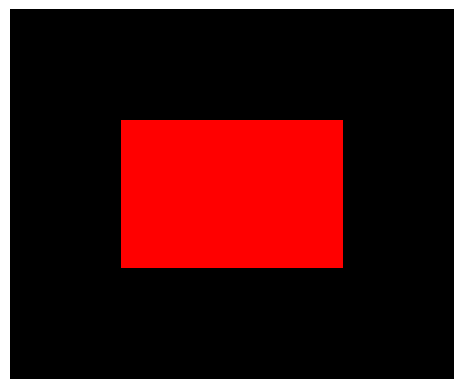

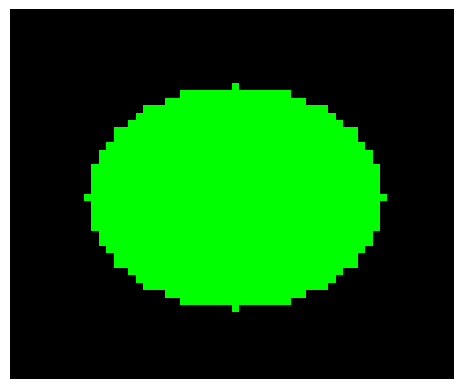

Succes!


In [25]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.zeros((m, n, 3), dtype=np.uint8)
    img[:, :] = background_color
    start_x = (m - a) // 2
    start_y = (n - b) // 2
    img[start_x:start_x+a, start_y:start_y+b] = rectangle_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.zeros((m, n, 3), dtype=np.uint8)
    img[:, :] = background_color
    x0, y0 = m // 2, n // 2
    for i in range(m):
        for j in range(n):
            if ((i - x0)**2 / a**2 + (j - y0)**2 / b**2) <= 1:
                img[i, j] = ellipse_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

def test_draw_shapes():
    rect_img = draw_rectangle(20, 30, 50, 60, [255,0,0], [0,0,0])
    assert rect_img.shape == (50, 60, 3)
    assert (rect_img[0,0] == [0,0,0]).all()
    assert (rect_img[25,30] == [255,0,0]).all()

    ellipse_img = draw_ellipse(15, 20, 50, 60, [0,255,0], [0,0,0])
    assert ellipse_img.shape == (50, 60, 3)
    assert (ellipse_img[0,0] == [0,0,0]).all()
    assert (ellipse_img[25,30] == [0,255,0]).all()
    print("Succes!")

if __name__ == "__main__":
    test_draw_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [27]:
def analyze_time_series(series, p=3):
    series = np.array(series)
    mean = series.mean()
    var = series.var()
    std = series.std()

    local_max = [i for i in range(1, len(series)-1) if series[i] > series[i-1] and series[i] > series[i+1]]
    local_min = [i for i in range(1, len(series)-1) if series[i] < series[i-1] and series[i] < series[i+1]]

    if p > len(series):
        moving_avg = np.array([])
    else:
        moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')

    return {
        "mean": mean,
        "variance": var,
        "std": std,
        "local_max": local_max,
        "local_min": local_min,
        "moving_avg": moving_avg
    }

def test_analyze_time_series():
    series = [1, 3, 2, 5, 4, 6, 5]
    result = analyze_time_series(series, p=3)

    assert np.isclose(result["mean"], np.mean(series))
    assert np.isclose(result["variance"], np.var(series))
    assert np.isclose(result["std"], np.std(series))
    assert result["local_max"] == [1, 3, 5]
    assert result["local_min"] == [2, 4]
    assert np.allclose(result["moving_avg"], np.convolve(series, np.ones(3)/3, mode='valid'))
    print("Succes!")

if __name__ == "__main__":
    test_analyze_time_series()

Succes!


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [24]:
def one_hot_encode(labels: np.ndarray) -> np.ndarray:
    arr = np.array(labels, dtype=int)
    if arr.size == 0:
        return np.empty((0, 0), dtype=int)
    if arr.min() < 0:
        raise ValueError('Labels must be non-negative integers')
    num_classes = arr.max() + 1
    out = np.zeros((arr.size, num_classes), dtype=int)
    out[np.arange(arr.size), arr] = 1
    return out

# Тесты
def test_one_hot_encode():
    labels = np.array([0, 2, 3, 0])
    oh = one_hot_encode(labels)
    expected = np.array([[1,0,0,0],[0,0,1,0],[0,0,0,1],[1,0,0,0]])
    assert np.array_equal(oh, expected)
    print("Succes!")

if __name__ == '__main__':
    test_one_hot_encode()

Succes!
